In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos crudos

In [2]:
mesas_totales_lista = pd.read_csv('dataset/mesas_totales_lista.dsv', sep= '|')
mesas_totales = pd.read_csv('dataset/mesas_totales.dsv', sep= '|')
mesas_totales_agrp_politica = pd.read_csv('dataset/mesas_totales_agrp_politica.dsv', sep= '|')
descripcion_regiones = pd.read_csv('dataset/descripcion_regiones.dsv', sep= '|')
descripcion_postulaciones = pd.read_csv('dataset/descripcion_postulaciones.dsv', sep= '|')

/Volumes/Extra/Proyects/CursoNlp/NLP/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Conteo de votos por agrupación política

In [3]:
mesas_totales_agrp_politica.head()

,CODIGO_DISTRITO,CODIGO_SECCION,CODIGO_CIRCUITO,CODIGO_MESA,CODIGO_CATEGORIA,CODIGO_AGRUPACION,VOTOS_AGRUPACION
0,1,1001,1001000001,0100100001X,100000000000,13,1
1,1,1001,1001000001,0100100001X,100000000000,131,5
2,1,1001,1001000001,0100100001X,100000000000,132,2
3,1,1001,1001000001,0100100001X,100000000000,133,15
4,1,1001,1001000001,0100100001X,100000000000,135,85


Text(0, 0.5, 'Frecuencia')

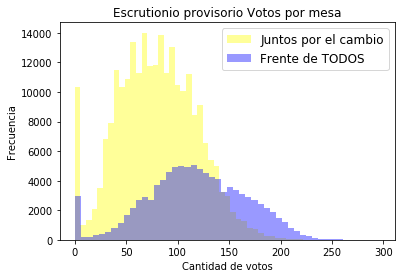

In [4]:
df =mesas_totales_agrp_politica[mesas_totales_agrp_politica['CODIGO_AGRUPACION'] == '135']
sns.distplot(df['VOTOS_AGRUPACION'],  kde=False, label='Juntos por el cambio', color='yellow')

df =mesas_totales_agrp_politica[mesas_totales_agrp_politica['CODIGO_AGRUPACION'] == '136']
sns.distplot(df['VOTOS_AGRUPACION'],  kde=False,label='Frente de TODOS', color='blue')
plt.legend(prop={'size': 12})
plt.title('Escrutionio provisorio Votos por mesa')
plt.xlabel('Cantidad de votos')
plt.ylabel('Frecuencia')

In [9]:
descripcion_postulaciones[descripcion_postulaciones['NOMBRE_CATEGORIA'] == 'Presidente y Vicepresidente de la República']

,CODIGO_CATEGORIA,NOMBRE_CATEGORIA,CODIGO_AGRUPACION,NOMBRE_AGRUPACION,CODIGO_LISTA,NOMBRE_LISTA
896,100000000000,Presidente y Vicepresidente de la República,135,JUNTOS POR EL CAMBIO,000100000000000.135.A.000100000000000.135,JUNTOS SOMOS EL CAMBIO - Mauricio Macri - Migu...
897,100000000000,Presidente y Vicepresidente de la República,131,FRENTE NOS,000100000000000.131.A.000100000000000.131,CELESTE 2019 - Juan Gomez - Cynthia Hotton
898,100000000000,Presidente y Vicepresidente de la República,13,MOVIMIENTO AL SOCIALISMO,000100000000000.13.A.000100000000000.13,UNIDAD DE LA IZQUIERDA - Manuela Castañeira - ...
899,100000000000,Presidente y Vicepresidente de la República,136,FRENTE DE TODOS,000100000000000.136.A.000100000000000.136,CELESTE Y BLANCA - Alberto Fernández - Cristin...
900,100000000000,Presidente y Vicepresidente de la República,36,PARTIDO AUTONOMISTA,000100000000000.36.A.000100000000000.36,VALORES Y EXPERIENCIA - José Romero - Guillerm...
901,100000000000,Presidente y Vicepresidente de la República,132,FRENTE PATRIOTA,000100000000000.132.A.000100000000000.132,CELESTE - Alejandro Biondini - Enrique Venturino
902,100000000000,Presidente y Vicepresidente de la República,133,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,000100000000000.133.A.000100000000000.133,UNIDAD - Nicolás Del Caño - Romina Del Pla
903,100000000000,Presidente y Vicepresidente de la República,137,CONSENSO FEDERAL,000100000000000.137.A.000100000000000.137,CONSENSO PARA EL FUTURO - Roberto Lavagna - Ju...
904,100000000000,Presidente y Vicepresidente de la República,87,UNITE POR LA LIBERTAD Y LA DIGNIDAD,000100000000000.87.A.000100000000000.87,DESPERTAR - José Espert - Luis Rosales
905,100000000000,Presidente y Vicepresidente de la República,57,MOVIMIENTO DE ACCION VECINAL,000100000000000.57.A.000100000000000.57,COMPROMISO VECINAL - Raúl Albarracin - Sergio ...


# Analisis de los porcentajes presidente

In [10]:
votos_presidente = mesas_totales_agrp_politica[mesas_totales_agrp_politica['CODIGO_CATEGORIA']== 100000000000]

In [11]:
votos_totales_prsidente = votos_presidente['VOTOS_AGRUPACION'].sum()
votos_totales_prsidente_TODOS=votos_presidente[votos_presidente['CODIGO_AGRUPACION'] == '135']['VOTOS_AGRUPACION'].sum()
votos_totales_prsidente_CAMBIEMOS=votos_presidente[votos_presidente['CODIGO_AGRUPACION'] == '136']['VOTOS_AGRUPACION'].sum()

In [12]:
votos_presidente_sum= votos_presidente.groupby('CODIGO_AGRUPACION')['VOTOS_AGRUPACION'].sum().reset_index()

In [25]:
votos_presidente_sum['CODIGO_AGRUPACION'] = ['MOVIMIENTO AL SOCIALISMO', 'FRENTE NOS','FRENTE PATRIOTA', '133','CAMBIEMOS', 'TODOS', 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 'PARTIDO AUTONOMISTA	', 'MOVIMIENTO DE ACCION VECINAL','UNITE POR LA LIBERTAD Y LA DIGNIDAD']

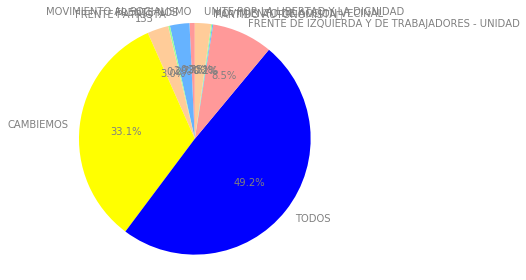

In [14]:
# Pie chart
labels = votos_presidente_sum['CODIGO_AGRUPACION']
sizes = votos_presidente_sum['VOTOS_AGRUPACION']
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', 'yellow', 'blue']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [26]:
mesas_totales_agrp_politica.head()

,CODIGO_DISTRITO,CODIGO_SECCION,CODIGO_CIRCUITO,CODIGO_MESA,CODIGO_CATEGORIA,CODIGO_AGRUPACION,VOTOS_AGRUPACION
0,1,1001,1001000001,0100100001X,100000000000,13,1
1,1,1001,1001000001,0100100001X,100000000000,131,5
2,1,1001,1001000001,0100100001X,100000000000,132,2
3,1,1001,1001000001,0100100001X,100000000000,133,15
4,1,1001,1001000001,0100100001X,100000000000,135,85


# Proyección utilizando el promedio de las mesas votadas por agrupación

In [27]:
mean_135 = mesas_totales_agrp_politica[(mesas_totales_agrp_politica['CODIGO_AGRUPACION'] == '135') & (mesas_totales_agrp_politica['VOTOS_AGRUPACION'] != 0)]['VOTOS_AGRUPACION'].mean()
mean_136 = mesas_totales_agrp_politica[(mesas_totales_agrp_politica['CODIGO_AGRUPACION'] == '136') & (mesas_totales_agrp_politica['VOTOS_AGRUPACION'] != 0)]['VOTOS_AGRUPACION'].mean()
mean_137 = mesas_totales_agrp_politica[(mesas_totales_agrp_politica['CODIGO_AGRUPACION'] == '137') & (mesas_totales_agrp_politica['VOTOS_AGRUPACION'] != 0)]['VOTOS_AGRUPACION'].mean()
mean_133 = mesas_totales_agrp_politica[(mesas_totales_agrp_politica['CODIGO_AGRUPACION'] == '133') & (mesas_totales_agrp_politica['VOTOS_AGRUPACION'] != 0)]['VOTOS_AGRUPACION'].mean()
mean_others = mesas_totales_agrp_politica[(mesas_totales_agrp_politica['CODIGO_AGRUPACION'] != '133') & (mesas_totales_agrp_politica['CODIGO_AGRUPACION'] != '137') & (mesas_totales_agrp_politica['CODIGO_AGRUPACION'] != '136') & (mesas_totales_agrp_politica['CODIGO_AGRUPACION'] != '135') &(mesas_totales_agrp_politica['VOTOS_AGRUPACION'] != 0)]['VOTOS_AGRUPACION'].mean()



In [18]:
totales_sin_zero = mesas_totales_agrp_politica.copy()

In [19]:
totales_sin_zero_135 = totales_sin_zero[totales_sin_zero['CODIGO_AGRUPACION'] == '135'].replace(0,mean_135)
totales_sin_zero_136 = totales_sin_zero[totales_sin_zero['CODIGO_AGRUPACION'] == '136'].replace(0,mean_136)
totales_sin_zero_137 = totales_sin_zero[totales_sin_zero['CODIGO_AGRUPACION'] == '137'].replace(0,mean_137)
totales_sin_zero_133 = totales_sin_zero[totales_sin_zero['CODIGO_AGRUPACION'] == '133'].replace(0,mean_133)
totales_sin_zero_others = totales_sin_zero[(totales_sin_zero['CODIGO_AGRUPACION'] != '133') & (totales_sin_zero['CODIGO_AGRUPACION'] != '135') & (totales_sin_zero['CODIGO_AGRUPACION'] != '136') & (totales_sin_zero['CODIGO_AGRUPACION'] != '137') &(totales_sin_zero['CODIGO_AGRUPACION'] != '133')].replace(0,mean_133) 

In [20]:
totales_sin_zero = totales_sin_zero_135

totales_sin_zero = totales_sin_zero.append(totales_sin_zero_136)
totales_sin_zero = totales_sin_zero.append(totales_sin_zero_137)
totales_sin_zero = totales_sin_zero.append(totales_sin_zero_133)
totales_sin_zero = totales_sin_zero.append(totales_sin_zero_others)
votos_presidente = totales_sin_zero[totales_sin_zero['CODIGO_CATEGORIA']== 100000000000]

In [21]:
votos_presidente_sum= votos_presidente.groupby('CODIGO_AGRUPACION')['VOTOS_AGRUPACION'].sum().reset_index()

In [22]:
votos_presidente_sum

,CODIGO_AGRUPACION,VOTOS_AGRUPACION
0,13,3.996621e+05
1,131,7.090954e+05
2,132,5.698972e+05
3,133,7.626262e+05
4,135,8.064738e+06
5,136,1.195731e+07
6,137,2.081625e+06
7,36,6.746201e+05
8,57,6.586309e+05
9,87,6.208249e+05


In [23]:
votos_presidente_sum['CODIGO_AGRUPACION'] = ['FIT-U', 'FRENTE NOS','FRENTE PATRIOTA', '133','CAMBIEMOS', 'TODOS', 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 'PARTIDO AUTONOMISTA	', 'MOVIMIENTO DE ACCION VECINAL','UNITE POR LA LIBERTAD Y LA DIGNIDAD']
votos_presidente_sum['CODIGO_AGRUPACION']

0                                             FIT-U
1                                        FRENTE NOS
2                                   FRENTE PATRIOTA
3                                               133
4                                         CAMBIEMOS
5                                             TODOS
6    FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
7                             PARTIDO AUTONOMISTA\t
8                      MOVIMIENTO DE ACCION VECINAL
9               UNITE POR LA LIBERTAD Y LA DIGNIDAD
Name: CODIGO_AGRUPACION, dtype: object

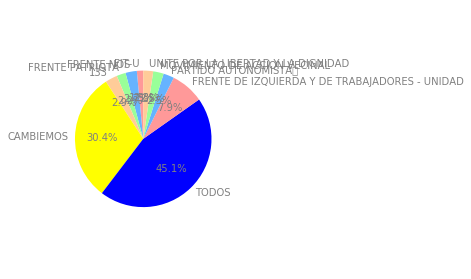

In [24]:
# Pie chart
labels = votos_presidente_sum['CODIGO_AGRUPACION']
sizes = votos_presidente_sum['VOTOS_AGRUPACION']
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', 'yellow', 'blue']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()